# Capstone: Reputation Scoring For Cryptocurrency Transactions

### Authors: Sudip Bhattacharyya, Daniel Freeman, Timothy McWilliams

### 1. Libraries

In [51]:
# Import Lib's 
import pandas as pd
import hashlib
from pandas.io import gbq
from random import shuffle
from functools import reduce
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline
from sklearn import metrics as mt
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split, StratifiedKFold, StratifiedShuffleSplit, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.feature_selection import chi2
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Initialize Project

In [6]:
## Insert the BigQuery Project ID

projectid = "capstone-202618"

### 3. Import Data from Google Big Query

#### 3.1. Transactions Related to a Historical Bitcoin Heist

In [7]:
## Step1: Identify hacked transactions from history of Bitcoin Heists (Map Data.tx and Data.txh)

tx_hack = gbq.read_gbq('SELECT Data.txh.int64_field_0 as txID, Data.txh.string_field_1 as tx_hash, Data.tx.int64_field_1 as blockID, Data.tx.int64_field_2 as n_inputs, Data.tx.int64_field_3 as n_outputs FROM Data.txh INNER JOIN Data.tx on Data.txh.int64_field_0 = Data.tx.int64_field_0 where Data.txh.string_field_1 in ("eb5b761c7380ed4c6adf688f9e5ab94953dcabeda47d9eeabd77261902fccccf", "4885ddf124a0f97b5a3775a12de0274d342d12842ebe59520359f976721ac8c3", "1MAazCWMydsQB5ynYXqSGQDjNQMN3HFmEu", "111291fcf8ab84803d42ec59cb4eaceadd661185242a1e8f4b7e49b79ecbe5f3", "81f591582b436c5b129f347fe7e681afd6811417973c4a4f83b18e92a9d130fd", "ddddf9f04b4c1d4e1185cacf5cf302f3d11dee5d74f71721d741fbb507062e9e", "305fbc2ec7f7f2bc5a21d2dfb01a5fc52ab5d064a7278e2ecbab0d2a27b8c392", "f0137a6b31947cf7ab367ae23942a263272c41f36252fcd3460ee8b6e94a84c1", "633acf266c913523ab5ed9fcc4632bae18d2a7efc1744fd43dd669e5f2869ce5", "5bd88ab32b50e4a691dcfd1fff9396f512e003d7275bb5c1b816ab071beca5ba", "64c01fedd5cf6d306ca18d85e842f068e19488126c411741e089be8f4052df09", "3be0ac3dc1c3b7fa7fbe34f4678037ed733a14e801abe6d3da42bc643a651401", "9edab6e7fadf1d6006315ff9394c08a7bf42e19cf61502200a1f73994f8da94b", "835d4dcc52e160c23173658de0b747082f1937d1184e8e1838e9394bc62c0392", "aebe39a99114f1b46fc5a67289545e54cbfec92d08fc8ffc92dc9df4a15ea05a", "aa62bdd690de061a6fbbd88420f7a7aa574ba86da4fe82edc27e2263f8743988", "6a86e6a5e8d5f9e9492114dafe5056c5618222f5042408ad867d3c1888855a31", "7ad47a19b201ce052f98161de1b1457bacaca2e698f542e196d4c7f8f45899ab", "0ca7f7299dc8d87c26c82badf9a303049098af050698c694fbec35c4b08fc3df", "3ab5f53978850413a273920bfc86f4278d9c418272accddade736990d60bdd53", "03acfae47d1e0b7674f1193237099d1553d3d8a93ecc85c18c4bec37544fe386", "15ad0894ab42a46eb04108fb8bd66786566a74356d2103f077710733e0516c3a", "2d00ef4895f20904d7d4c0bada17a8e9d47d6c049cd2e5002f8914bfa7f1d27b", "6d39eeb2ae7f9d42b0569cf1009de4c9f031450873bf2ec84ce795837482e7a6", "07d33c8c74e945c50e45d3eaf4add7553534154503a478cf6d48e1c617b3f9f3", "6d5088c138e2fbf4ea7a8c2cb1b57a76c4b0a5fab5f4c188696aad807a5ba6d8", "5a09f4ef0e91bc7bc044365cd27236fe4ac3c02088ac21ab51c93c8a11d33d4b", "7b45c1742ca9f544cccd92d319ef8a5e19b7dcb8742990724c6a9c2f569ae732", "901dbcef30a541b8b55fae8f7ad9917ef0754bda5b643705f3773e590785c4d3", "a57132e2cbc580ac262aa3f7bac1e441d6573f9633118bc48009618585a0967e", "a82ad85286c68f37a2feda1f5e8a4efa9db1e642b4ef53cb9fd86170169e5e68", "ff04763e3e8c93e43799dbbca833e183faad7e2611f20f136f47c2f1049481ae", "0268b7285b95444808753969099f7ae43fb4193d442e3e0deebb10e2bb1764d0", "34b84108a142ad7b6c36f0f3549a3e83dcdbb60e0ba0df96cd48f852da0b1acb", "14350f6f2bda8f4220f5b5e11022ab126a4b178e5c4fca38c6e0deb242c40c5f", "266e4682abdf4932c4c271872ca9ba6bfdbe75941eb9ba4c4d81e4d3c7364e4b", "40fc8f6b2f222fb2871a38a245132ed1eada9ff6aec8d46ebe74b29c64fd82a7", "bf70ac1d2b702dbe0e14fbefb3a0cb2ff5ee5aa425cfe4249f16d6ede7b3ff14", "92968a2331a02a3128460a64ba16fbf8d3a2fc79ebc8882300015d3ca0e4fb17", "7a22917744aa9ed740faf3068a2f895424ed816ed1a04012b47df7a493f056e8", "4c61d3639f010e30ad305b294cd128f381f58fc161d0badda1f39807dc2f12f7.", "83f3c30dc4fa25afe57b85651b9bbc372e8789d81b08d6966ea81f524e0a02be", "d5d23a05858236c379d2aa30886b97600506933bc46c6f2aab2e05da85e61ad2", "358c873892016649ace8e9db4c59f98a6ca8165287ac80e80c52e621f5a26e46", "f9d55dc4b8af65e15f856496335a29e2be40f128a7374c75b75529e864579f93", "42ea472060118ee5aee801cdedbc4a3403f3708a87340660f766e2669f0afeb0", "6f85951bcecbe64999ad192275af087c5be2922ee13937693992c1ddf9ae8ce6", "8e6a2d0b8132d3d9edc1fcffe1b3079de59c10c67522e2abc51c1d84b260fdac", "9dfdb24667657365c469ff20568fcc820f6f028a125d9c22dc521ae44dcf7c5e", "bd2ad7b49c22d12cf2f8f12ef601952aed2a96907af4df732156fd90165b5ef5", "d0035ad189634e90239cca82eb53f78e08c0179620b2bd24e2cb291478c7d57a", "a2b642bafea45bc128d81314ef33542bc807811ba066329eaa1306bd62bec075", "04e378f81eb620f21927639cd4cda00e0473ca958f4d21f2255f37554b5440fa", "065e7ff6b1503fc023876ffe930dcd9866531812e40bbda72835f232c2f23910", "0723b67631588b6d5a4a406a9ef8d431c0d5282c6f1cb308fef57c7503d83158", "0ae924c33555b294a3f0b256da6a02ab996d30be00eaf184d53281009a3a50d6", "3f938408deb6d20a74f6256d3ba0217df266450d4c00c40d94df7b840f66db05", "9766b624e004ad1a9369b1b461d33f57e7dddabb43942d34ac10e912cd9ce36b", "2db76ebd4b5eecf008334d1bdc1f63f764ca3fb9275557a2a82d52ebf52eea9f", "c041a74fd565c3eb247ff4b1fb6eb0ab9299c3e7d58e5172c28cbe9540858d5a", "82719bedd0730511385faf68d88b9a03e269a40e3fa5f269efe4a9fc3a821f7f", "2bc69aa29f56d7051f9cb19bf923c5e2a81879b4f6a3bc849f4166f56d417c2a", "8d6602b0e8e4479d79e5dab0c35bdb4f7545513cb426411348ec1502413a8f80", "3a66ebef43041f230e799f1efd3a93e41f875c718da683e236632e13a70cf898", "0197692748ba894697a0a48fdfdb3e72f3275b079005efad8be062de38b65edf") order by Data.txh.int64_field_0', projectid)
print(tx_hack.shape)
tx_hack.head()

(63, 5)


,txID,tx_hash,blockID,n_inputs,n_outputs
0,101661,eb5b761c7380ed4c6adf688f9e5ab94953dcabeda47d9e...,73272,1,2
1,718648,4885ddf124a0f97b5a3775a12de0274d342d12842ebe59...,130560,478,2
2,1761950,6d5088c138e2fbf4ea7a8c2cb1b57a76c4b0a5fab5f4c1...,150951,3,2
3,1761951,07d33c8c74e945c50e45d3eaf4add7553534154503a478...,150951,3,2
4,1761952,6d39eeb2ae7f9d42b0569cf1009de4c9f031450873bf2e...,150951,2,2


In [8]:
## Step2: Extract unique transaction id's and export to a csv file

txID_hack = tx_hack['txID']
txID_hack.to_csv('C:/Users/Sudip/Documents/SMU - MSDS/Coursework/Capstone/Working Files/txID_hack.csv')

In [9]:
## Step3: Map block details (from Data.bh)

block_hack = gbq.read_gbq('SELECT Data.bh.int64_field_0 AS blockID, Data.bh.string_field_1 AS block_hash, Data.bh.int64_field_2 AS block_timestamp, Data.bh.int64_field_3 AS block_n_txs, Data.tx.int64_field_0 AS txID FROM Data.bh INNER JOIN Data.tx on Data.bh.int64_field_0 = Data.tx.int64_field_1 where Data.tx.int64_field_0 in (7953142, 1761953, 1761954, 1761966, 2529782, 8411304, 8915877, 1761972, 6719707, 2529786, 7953108, 1761955, 1761964, 101661, 2802835, 2529773, 2802644, 7495627, 2802645, 8257853, 1761969, 2529781, 1761968, 1761965, 1761952, 2529787, 2530053, 6719706, 2529784, 2529785, 8169822, 718648, 1761967, 1761970, 8114098, 6720088, 1761957, 1761956, 7953106, 8915883, 1761961, 2529783, 1761959, 8217787, 1761951, 1761971, 2803134, 7495626, 1761963, 8387390, 1761962, 1761960, 1761958, 8915880, 6720083, 8915875, 8678426, 8780222, 8518014, 6720176, 7953076, 1761950, 3101854) order by Data.tx.int64_field_0', projectid)
tx_hack = pd.merge(tx_hack, block_hack)
print(tx_hack.shape)
tx_hack.head()

(63, 8)


,txID,tx_hash,blockID,n_inputs,n_outputs,block_hash,block_timestamp,block_n_txs
0,101661,eb5b761c7380ed4c6adf688f9e5ab94953dcabeda47d9e...,73272,1,2,00000000006aba8ba340b7ae875b0b1be1af394b4a2610...,1281389711,7
1,718648,4885ddf124a0f97b5a3775a12de0274d342d12842ebe59...,130560,478,2,00000000000015b9b2b91c82f5d95e7456b754cc188e58...,1307983943,11
2,1761950,6d5088c138e2fbf4ea7a8c2cb1b57a76c4b0a5fab5f4c1...,150951,3,2,0000000000000449ee5b94ba7a051caffff5c23d6a0333...,1319836288,27
3,1761951,07d33c8c74e945c50e45d3eaf4add7553534154503a478...,150951,3,2,0000000000000449ee5b94ba7a051caffff5c23d6a0333...,1319836288,27
4,1761952,6d39eeb2ae7f9d42b0569cf1009de4c9f031450873bf2e...,150951,2,2,0000000000000449ee5b94ba7a051caffff5c23d6a0333...,1319836288,27


In [10]:
## Step4: Map Transaction Input Amount (from Data.txin)

input_amount_hack =  gbq.read_gbq('SELECT Data.tx.int64_field_0 AS txID, Data.txin.int64_field_1 AS input_seq, Data.txin.int64_field_4 AS input_addrID, int64_field_5 AS input_sum FROM Data.tx INNER JOIN Data.txin on Data.tx.int64_field_0 = Data.txin.int64_field_0 where Data.tx.int64_field_0 in (7953142, 1761953, 1761954, 1761966, 2529782, 8411304, 8915877, 1761972, 6719707, 2529786, 7953108, 1761955, 1761964, 101661, 2802835, 2529773, 2802644, 7495627, 2802645, 8257853, 1761969, 2529781, 1761968, 1761965, 1761952, 2529787, 2530053, 6719706, 2529784, 2529785, 8169822, 718648, 1761967, 1761970, 8114098, 6720088, 1761957, 1761956, 7953106, 8915883, 1761961, 2529783, 1761959, 8217787, 1761951, 1761971, 2803134, 7495626, 1761963, 8387390, 1761962, 1761960, 1761958, 8915880, 6720083, 8915875, 8678426, 8780222, 8518014, 6720176, 7953076, 1761950, 3101854) order by Data.tx.int64_field_0', projectid)
tx_hack = pd.merge(tx_hack, input_amount_hack)
print(tx_hack.shape)
tx_hack.head()

(1102, 11)


,txID,tx_hash,blockID,n_inputs,n_outputs,block_hash,block_timestamp,block_n_txs,input_seq,input_addrID,input_sum
0,101661,eb5b761c7380ed4c6adf688f9e5ab94953dcabeda47d9e...,73272,1,2,00000000006aba8ba340b7ae875b0b1be1af394b4a2610...,1281389711,7,0,98866,900000000000
1,718648,4885ddf124a0f97b5a3775a12de0274d342d12842ebe59...,130560,478,2,00000000000015b9b2b91c82f5d95e7456b754cc188e58...,1307983943,11,297,51853,5000000000
2,718648,4885ddf124a0f97b5a3775a12de0274d342d12842ebe59...,130560,478,2,00000000000015b9b2b91c82f5d95e7456b754cc188e58...,1307983943,11,288,43541,5000000000
3,718648,4885ddf124a0f97b5a3775a12de0274d342d12842ebe59...,130560,478,2,00000000000015b9b2b91c82f5d95e7456b754cc188e58...,1307983943,11,289,61765,5000000000
4,718648,4885ddf124a0f97b5a3775a12de0274d342d12842ebe59...,130560,478,2,00000000000015b9b2b91c82f5d95e7456b754cc188e58...,1307983943,11,290,43617,5000000000


In [11]:
## Step5: Map Transaction Output Amount (from Data.txin)

output_amount_hack =  gbq.read_gbq('SELECT Data.tx.int64_field_0 AS txID, Data.txout.int64_field_1 AS output_seq, Data.txout.int64_field_2 AS output_addrID, Data.txout.int64_field_3 AS output_sum FROM Data.tx INNER JOIN Data.txout on Data.tx.int64_field_0 = Data.txout.int64_field_0 where Data.tx.int64_field_0 in (7953142, 1761953, 1761954, 1761966, 2529782, 8411304, 8915877, 1761972, 6719707, 2529786, 7953108, 1761955, 1761964, 101661, 2802835, 2529773, 2802644, 7495627, 2802645, 8257853, 1761969, 2529781, 1761968, 1761965, 1761952, 2529787, 2530053, 6719706, 2529784, 2529785, 8169822, 718648, 1761967, 1761970, 8114098, 6720088, 1761957, 1761956, 7953106, 8915883, 1761961, 2529783, 1761959, 8217787, 1761951, 1761971, 2803134, 7495626, 1761963, 8387390, 1761962, 1761960, 1761958, 8915880, 6720083, 8915875, 8678426, 8780222, 8518014, 6720176, 7953076, 1761950, 3101854) order by Data.tx.int64_field_0', projectid)
tx_hack = pd.merge(tx_hack, output_amount_hack)
print(tx_hack.shape)
tx_hack.head()

(2172, 14)


,txID,tx_hash,blockID,n_inputs,n_outputs,block_hash,block_timestamp,block_n_txs,input_seq,input_addrID,input_sum,output_seq,output_addrID,output_sum
0,101661,eb5b761c7380ed4c6adf688f9e5ab94953dcabeda47d9e...,73272,1,2,00000000006aba8ba340b7ae875b0b1be1af394b4a2610...,1281389711,7,0,98866,900000000000,1,98910,899900000000
1,101661,eb5b761c7380ed4c6adf688f9e5ab94953dcabeda47d9e...,73272,1,2,00000000006aba8ba340b7ae875b0b1be1af394b4a2610...,1281389711,7,0,98866,900000000000,0,98866,100000000
2,718648,4885ddf124a0f97b5a3775a12de0274d342d12842ebe59...,130560,478,2,00000000000015b9b2b91c82f5d95e7456b754cc188e58...,1307983943,11,297,51853,5000000000,0,794504,1000000
3,718648,4885ddf124a0f97b5a3775a12de0274d342d12842ebe59...,130560,478,2,00000000000015b9b2b91c82f5d95e7456b754cc188e58...,1307983943,11,297,51853,5000000000,1,787092,2500000000000
4,718648,4885ddf124a0f97b5a3775a12de0274d342d12842ebe59...,130560,478,2,00000000000015b9b2b91c82f5d95e7456b754cc188e58...,1307983943,11,288,43541,5000000000,0,794504,1000000


In [12]:
## Step6: Assign risk factor

tx_hack['risk'] = 1
print(tx_hack.shape)
tx_hack.head()

(2172, 15)


,txID,tx_hash,blockID,n_inputs,n_outputs,block_hash,block_timestamp,block_n_txs,input_seq,input_addrID,input_sum,output_seq,output_addrID,output_sum,risk
0,101661,eb5b761c7380ed4c6adf688f9e5ab94953dcabeda47d9e...,73272,1,2,00000000006aba8ba340b7ae875b0b1be1af394b4a2610...,1281389711,7,0,98866,900000000000,1,98910,899900000000,1
1,101661,eb5b761c7380ed4c6adf688f9e5ab94953dcabeda47d9e...,73272,1,2,00000000006aba8ba340b7ae875b0b1be1af394b4a2610...,1281389711,7,0,98866,900000000000,0,98866,100000000,1
2,718648,4885ddf124a0f97b5a3775a12de0274d342d12842ebe59...,130560,478,2,00000000000015b9b2b91c82f5d95e7456b754cc188e58...,1307983943,11,297,51853,5000000000,0,794504,1000000,1
3,718648,4885ddf124a0f97b5a3775a12de0274d342d12842ebe59...,130560,478,2,00000000000015b9b2b91c82f5d95e7456b754cc188e58...,1307983943,11,297,51853,5000000000,1,787092,2500000000000,1
4,718648,4885ddf124a0f97b5a3775a12de0274d342d12842ebe59...,130560,478,2,00000000000015b9b2b91c82f5d95e7456b754cc188e58...,1307983943,11,288,43541,5000000000,0,794504,1000000,1


#### 3.2 Transaction Free from Known Incidents

In [13]:
## Step1: Identify non-hacked transactions from history (Map Data.tx and Data.txh)

tx_non_hack = gbq.read_gbq('SELECT Data.txh.int64_field_0 as txID, Data.txh.string_field_1 as tx_hash, Data.tx.int64_field_1 as blockID, Data.tx.int64_field_2 as n_inputs, Data.tx.int64_field_3 as n_outputs FROM Data.txh INNER JOIN Data.tx on Data.txh.int64_field_0 = Data.tx.int64_field_0 where Data.txh.string_field_1 NOT IN ("eb5b761c7380ed4c6adf688f9e5ab94953dcabeda47d9eeabd77261902fccccf", "4885ddf124a0f97b5a3775a12de0274d342d12842ebe59520359f976721ac8c3", "1MAazCWMydsQB5ynYXqSGQDjNQMN3HFmEu", "111291fcf8ab84803d42ec59cb4eaceadd661185242a1e8f4b7e49b79ecbe5f3", "81f591582b436c5b129f347fe7e681afd6811417973c4a4f83b18e92a9d130fd", "ddddf9f04b4c1d4e1185cacf5cf302f3d11dee5d74f71721d741fbb507062e9e", "305fbc2ec7f7f2bc5a21d2dfb01a5fc52ab5d064a7278e2ecbab0d2a27b8c392", "f0137a6b31947cf7ab367ae23942a263272c41f36252fcd3460ee8b6e94a84c1", "633acf266c913523ab5ed9fcc4632bae18d2a7efc1744fd43dd669e5f2869ce5", "5bd88ab32b50e4a691dcfd1fff9396f512e003d7275bb5c1b816ab071beca5ba", "64c01fedd5cf6d306ca18d85e842f068e19488126c411741e089be8f4052df09", "3be0ac3dc1c3b7fa7fbe34f4678037ed733a14e801abe6d3da42bc643a651401", "9edab6e7fadf1d6006315ff9394c08a7bf42e19cf61502200a1f73994f8da94b", "835d4dcc52e160c23173658de0b747082f1937d1184e8e1838e9394bc62c0392", "aebe39a99114f1b46fc5a67289545e54cbfec92d08fc8ffc92dc9df4a15ea05a", "aa62bdd690de061a6fbbd88420f7a7aa574ba86da4fe82edc27e2263f8743988", "6a86e6a5e8d5f9e9492114dafe5056c5618222f5042408ad867d3c1888855a31", "7ad47a19b201ce052f98161de1b1457bacaca2e698f542e196d4c7f8f45899ab", "0ca7f7299dc8d87c26c82badf9a303049098af050698c694fbec35c4b08fc3df", "3ab5f53978850413a273920bfc86f4278d9c418272accddade736990d60bdd53", "03acfae47d1e0b7674f1193237099d1553d3d8a93ecc85c18c4bec37544fe386", "15ad0894ab42a46eb04108fb8bd66786566a74356d2103f077710733e0516c3a", "2d00ef4895f20904d7d4c0bada17a8e9d47d6c049cd2e5002f8914bfa7f1d27b", "6d39eeb2ae7f9d42b0569cf1009de4c9f031450873bf2ec84ce795837482e7a6", "07d33c8c74e945c50e45d3eaf4add7553534154503a478cf6d48e1c617b3f9f3", "6d5088c138e2fbf4ea7a8c2cb1b57a76c4b0a5fab5f4c188696aad807a5ba6d8", "5a09f4ef0e91bc7bc044365cd27236fe4ac3c02088ac21ab51c93c8a11d33d4b", "7b45c1742ca9f544cccd92d319ef8a5e19b7dcb8742990724c6a9c2f569ae732", "901dbcef30a541b8b55fae8f7ad9917ef0754bda5b643705f3773e590785c4d3", "a57132e2cbc580ac262aa3f7bac1e441d6573f9633118bc48009618585a0967e", "a82ad85286c68f37a2feda1f5e8a4efa9db1e642b4ef53cb9fd86170169e5e68", "ff04763e3e8c93e43799dbbca833e183faad7e2611f20f136f47c2f1049481ae", "0268b7285b95444808753969099f7ae43fb4193d442e3e0deebb10e2bb1764d0", "34b84108a142ad7b6c36f0f3549a3e83dcdbb60e0ba0df96cd48f852da0b1acb", "14350f6f2bda8f4220f5b5e11022ab126a4b178e5c4fca38c6e0deb242c40c5f", "266e4682abdf4932c4c271872ca9ba6bfdbe75941eb9ba4c4d81e4d3c7364e4b", "40fc8f6b2f222fb2871a38a245132ed1eada9ff6aec8d46ebe74b29c64fd82a7", "bf70ac1d2b702dbe0e14fbefb3a0cb2ff5ee5aa425cfe4249f16d6ede7b3ff14", "92968a2331a02a3128460a64ba16fbf8d3a2fc79ebc8882300015d3ca0e4fb17", "7a22917744aa9ed740faf3068a2f895424ed816ed1a04012b47df7a493f056e8", "4c61d3639f010e30ad305b294cd128f381f58fc161d0badda1f39807dc2f12f7.", "83f3c30dc4fa25afe57b85651b9bbc372e8789d81b08d6966ea81f524e0a02be", "d5d23a05858236c379d2aa30886b97600506933bc46c6f2aab2e05da85e61ad2", "358c873892016649ace8e9db4c59f98a6ca8165287ac80e80c52e621f5a26e46", "f9d55dc4b8af65e15f856496335a29e2be40f128a7374c75b75529e864579f93", "42ea472060118ee5aee801cdedbc4a3403f3708a87340660f766e2669f0afeb0", "6f85951bcecbe64999ad192275af087c5be2922ee13937693992c1ddf9ae8ce6", "8e6a2d0b8132d3d9edc1fcffe1b3079de59c10c67522e2abc51c1d84b260fdac", "9dfdb24667657365c469ff20568fcc820f6f028a125d9c22dc521ae44dcf7c5e", "bd2ad7b49c22d12cf2f8f12ef601952aed2a96907af4df732156fd90165b5ef5", "d0035ad189634e90239cca82eb53f78e08c0179620b2bd24e2cb291478c7d57a", "a2b642bafea45bc128d81314ef33542bc807811ba066329eaa1306bd62bec075", "04e378f81eb620f21927639cd4cda00e0473ca958f4d21f2255f37554b5440fa", "065e7ff6b1503fc023876ffe930dcd9866531812e40bbda72835f232c2f23910", "0723b67631588b6d5a4a406a9ef8d431c0d5282c6f1cb308fef57c7503d83158", "0ae924c33555b294a3f0b256da6a02ab996d30be00eaf184d53281009a3a50d6", "3f938408deb6d20a74f6256d3ba0217df266450d4c00c40d94df7b840f66db05", "9766b624e004ad1a9369b1b461d33f57e7dddabb43942d34ac10e912cd9ce36b", "2db76ebd4b5eecf008334d1bdc1f63f764ca3fb9275557a2a82d52ebf52eea9f", "c041a74fd565c3eb247ff4b1fb6eb0ab9299c3e7d58e5172c28cbe9540858d5a", "82719bedd0730511385faf68d88b9a03e269a40e3fa5f269efe4a9fc3a821f7f", "2bc69aa29f56d7051f9cb19bf923c5e2a81879b4f6a3bc849f4166f56d417c2a", "8d6602b0e8e4479d79e5dab0c35bdb4f7545513cb426411348ec1502413a8f80", "3a66ebef43041f230e799f1efd3a93e41f875c718da683e236632e13a70cf898", "0197692748ba894697a0a48fdfdb3e72f3275b079005efad8be062de38b65edf") LIMIT 1000000', projectid)
tx_non_hack = tx_non_hack.sort_values(by = ['txID'])
print(tx_non_hack.shape)
tx_non_hack.head()

(1000000, 5)


,txID,tx_hash,blockID,n_inputs,n_outputs
64982,62,701ce76c033e0b03fa79503770a5874840373e30cd9c1e...,62,0,1
213905,70,aa5f3068b53941915d82be382f2b35711305ec7d454a34...,70,0,1
515410,207,3eb409c61a3314558d8355a9f2e5ab4470cd12cac3d3eb...,202,0,1
213906,298,eb82621de40f57f1d30612da0054f05e0ea5eb632951a6...,291,0,1
739636,358,7bb7e39b2db8ca464db731ab5ce9cf8da82c57f85a97b1...,351,0,1


In [14]:
## Step2: Map block details (from Data.bh)

block_non_hack = gbq.read_gbq('SELECT Data.bh.int64_field_0 AS blockID, Data.bh.string_field_1 AS block_hash, Data.bh.int64_field_2 AS block_timestamp, Data.bh.int64_field_3 AS block_n_txs, Data.tx.int64_field_0 AS txID FROM Data.bh INNER JOIN Data.tx on Data.bh.int64_field_0 = Data.tx.int64_field_1 where Data.tx.int64_field_0 NOT in (7953142, 1761953, 1761954, 1761966, 2529782, 8411304, 8915877, 1761972, 6719707, 2529786, 7953108, 1761955, 1761964, 101661, 2802835, 2529773, 2802644, 7495627, 2802645, 8257853, 1761969, 2529781, 1761968, 1761965, 1761952, 2529787, 2530053, 6719706, 2529784, 2529785, 8169822, 718648, 1761967, 1761970, 8114098, 6720088, 1761957, 1761956, 7953106, 8915883, 1761961, 2529783, 1761959, 8217787, 1761951, 1761971, 2803134, 7495626, 1761963, 8387390, 1761962, 1761960, 1761958, 8915880, 6720083, 8915875, 8678426, 8780222, 8518014, 6720176, 7953076, 1761950, 3101854) LIMIT 1000000', projectid)
tx_non_hack = pd.merge(tx_non_hack, block_non_hack)
print(tx_non_hack.shape)
tx_non_hack.head()

(1736, 8)


,txID,tx_hash,blockID,n_inputs,n_outputs,block_hash,block_timestamp,block_n_txs
0,2434,f52d78150746f8db15ff4d15c1a0dd0e3ecbf36802c95d...,2403,0,1,00000000a8dbbd2c5c1b17611ddde87ef045a49e528dd9...,1233357411,1
1,3090,1f379c543833990183a642fe4a91c2041b0351a8a94406...,3040,0,1,00000000d49db14e5c9db263bbc5989f3eb4cbbbcf7ae8...,1233790027,1
2,3139,5ce734271d683c247c555142cad43806d9574a31e7c4f6...,3089,0,1,00000000f1d6d6a4200dc8f0d2b9d2a70fd5e14e4f4534...,1233826570,1
3,3485,bac7334be18f34c81b53f8778fdf597a9c485deea887da...,3431,0,1,000000000150d645c43690bc7ba1caaa7add0a25bd32c2...,1234059037,1
4,3495,0349a40a0889a79221c0a22d86c6f1faf459f178b96e1f...,3441,0,1,00000000d77100eeadaa69f6232358a6f7b79199108f84...,1234066802,1


In [15]:
## Step4: Map Transaction Input Amount (from Data.txin)

input_amount_non_hack =  gbq.read_gbq('SELECT Data.tx.int64_field_0 AS txID, Data.txin.int64_field_1 AS input_seq, Data.txin.int64_field_4 AS input_addrID, int64_field_5 AS input_sum FROM Data.tx INNER JOIN Data.txin on Data.tx.int64_field_0 = Data.txin.int64_field_0 where Data.tx.int64_field_0 NOT in (7953142, 1761953, 1761954, 1761966, 2529782, 8411304, 8915877, 1761972, 6719707, 2529786, 7953108, 1761955, 1761964, 101661, 2802835, 2529773, 2802644, 7495627, 2802645, 8257853, 1761969, 2529781, 1761968, 1761965, 1761952, 2529787, 2530053, 6719706, 2529784, 2529785, 8169822, 718648, 1761967, 1761970, 8114098, 6720088, 1761957, 1761956, 7953106, 8915883, 1761961, 2529783, 1761959, 8217787, 1761951, 1761971, 2803134, 7495626, 1761963, 8387390, 1761962, 1761960, 1761958, 8915880, 6720083, 8915875, 8678426, 8780222, 8518014, 6720176, 7953076, 1761950, 3101854) LIMIT 1000000', projectid)
tx_non_hack = pd.merge(tx_non_hack, input_amount_non_hack)
print(tx_non_hack.shape)
tx_non_hack.head()

(0, 11)


,txID,tx_hash,blockID,n_inputs,n_outputs,block_hash,block_timestamp,block_n_txs,input_seq,input_addrID,input_sum


In [16]:
## Step5: Map Transaction Output Amount (from Data.txin)

output_amount_non_hack =  gbq.read_gbq('SELECT Data.tx.int64_field_0 AS txID, Data.txout.int64_field_1 AS output_seq, Data.txout.int64_field_2 AS output_addrID, Data.txout.int64_field_3 AS output_sum FROM Data.tx INNER JOIN Data.txout on Data.tx.int64_field_0 = Data.txout.int64_field_0 where Data.tx.int64_field_0 NOT in (7953142, 1761953, 1761954, 1761966, 2529782, 8411304, 8915877, 1761972, 6719707, 2529786, 7953108, 1761955, 1761964, 101661, 2802835, 2529773, 2802644, 7495627, 2802645, 8257853, 1761969, 2529781, 1761968, 1761965, 1761952, 2529787, 2530053, 6719706, 2529784, 2529785, 8169822, 718648, 1761967, 1761970, 8114098, 6720088, 1761957, 1761956, 7953106, 8915883, 1761961, 2529783, 1761959, 8217787, 1761951, 1761971, 2803134, 7495626, 1761963, 8387390, 1761962, 1761960, 1761958, 8915880, 6720083, 8915875, 8678426, 8780222, 8518014, 6720176, 7953076, 1761950, 3101854) LIMIT 1000000', projectid)
tx_non_hack = pd.merge(tx_non_hack, output_amount_non_hack)
print(tx_non_hack.shape)
tx_non_hack.head()

(0, 14)


,tx_hash,blockID,n_inputs,n_outputs,block_hash,block_timestamp,block_n_txs,input_seq,input_addrID,input_sum,txID,output_seq,output_addrID,output_sum


In [17]:
## Step6: Assign risk factor

tx_non_hack['risk'] = 0
print(tx_non_hack.shape)
tx_non_hack.head()

(0, 15)


,tx_hash,blockID,n_inputs,n_outputs,block_hash,block_timestamp,block_n_txs,input_seq,input_addrID,input_sum,txID,output_seq,output_addrID,output_sum,risk


# Since this process resulted into 0 records for non-hack segment, I ran the SQL queries directly on Google Big Query platform, created required files there and imported the final file to this notebook.

In [18]:
## Step1: Import tx_non_hack from GBQ

tx_non_hack = gbq.read_gbq('SELECT * FROM Data.tx_non_hack_3', projectid)
print(tx_non_hack.shape)
tx_non_hack.head()

(862617, 14)


,blockID,block_hash,block_timestamp,block_n_txs,txID,tx_hash,n_inputs,n_outputs,input_seq,input_addrID,input_sum,output_seq,output_addrID,output_sum
0,506066,00000000000000000044eae31ce519ba74e715d8801154...,1516893645,1944,295330991,e7fe71410049868ecf7f91df99b9746a9e5767fb6d8364...,1,20,0,365747202,73324266,14,365735536,21294
1,506066,00000000000000000044eae31ce519ba74e715d8801154...,1516893645,1944,295330991,e7fe71410049868ecf7f91df99b9746a9e5767fb6d8364...,1,20,0,365747202,73324266,15,365749634,18520
2,506066,00000000000000000044eae31ce519ba74e715d8801154...,1516893645,1944,295330991,e7fe71410049868ecf7f91df99b9746a9e5767fb6d8364...,1,20,0,365747202,73324266,16,354903183,3685362
3,506066,00000000000000000044eae31ce519ba74e715d8801154...,1516893645,1944,295330991,e7fe71410049868ecf7f91df99b9746a9e5767fb6d8364...,1,20,0,365747202,73324266,17,365749635,277765
4,506066,00000000000000000044eae31ce519ba74e715d8801154...,1516893645,1944,295330991,e7fe71410049868ecf7f91df99b9746a9e5767fb6d8364...,1,20,0,365747202,73324266,18,228123889,1150000


In [19]:
## Step2: Assign risk factor

tx_non_hack['risk'] = 0
print(tx_non_hack.shape)
tx_non_hack.head()

(862617, 15)


,blockID,block_hash,block_timestamp,block_n_txs,txID,tx_hash,n_inputs,n_outputs,input_seq,input_addrID,input_sum,output_seq,output_addrID,output_sum,risk
0,506066,00000000000000000044eae31ce519ba74e715d8801154...,1516893645,1944,295330991,e7fe71410049868ecf7f91df99b9746a9e5767fb6d8364...,1,20,0,365747202,73324266,14,365735536,21294,0
1,506066,00000000000000000044eae31ce519ba74e715d8801154...,1516893645,1944,295330991,e7fe71410049868ecf7f91df99b9746a9e5767fb6d8364...,1,20,0,365747202,73324266,15,365749634,18520,0
2,506066,00000000000000000044eae31ce519ba74e715d8801154...,1516893645,1944,295330991,e7fe71410049868ecf7f91df99b9746a9e5767fb6d8364...,1,20,0,365747202,73324266,16,354903183,3685362,0
3,506066,00000000000000000044eae31ce519ba74e715d8801154...,1516893645,1944,295330991,e7fe71410049868ecf7f91df99b9746a9e5767fb6d8364...,1,20,0,365747202,73324266,17,365749635,277765,0
4,506066,00000000000000000044eae31ce519ba74e715d8801154...,1516893645,1944,295330991,e7fe71410049868ecf7f91df99b9746a9e5767fb6d8364...,1,20,0,365747202,73324266,18,228123889,1150000,0


#### 3.2 Append Data for Hacks & Non-hacks

In [20]:
tx_btc = tx_hack
tx_btc.shape

(2172, 15)

In [21]:
tx_btc = tx_btc.append(tx_non_hack, ignore_index=True)
print(tx_btc.shape)
tx_btc.head()

(864789, 15)


,blockID,block_hash,block_n_txs,block_timestamp,input_addrID,input_seq,input_sum,n_inputs,n_outputs,output_addrID,output_seq,output_sum,risk,txID,tx_hash
0,73272,00000000006aba8ba340b7ae875b0b1be1af394b4a2610...,7,1281389711,98866,0,900000000000,1,2,98910,1,899900000000,1,101661,eb5b761c7380ed4c6adf688f9e5ab94953dcabeda47d9e...
1,73272,00000000006aba8ba340b7ae875b0b1be1af394b4a2610...,7,1281389711,98866,0,900000000000,1,2,98866,0,100000000,1,101661,eb5b761c7380ed4c6adf688f9e5ab94953dcabeda47d9e...
2,130560,00000000000015b9b2b91c82f5d95e7456b754cc188e58...,11,1307983943,51853,297,5000000000,478,2,794504,0,1000000,1,718648,4885ddf124a0f97b5a3775a12de0274d342d12842ebe59...
3,130560,00000000000015b9b2b91c82f5d95e7456b754cc188e58...,11,1307983943,51853,297,5000000000,478,2,787092,1,2500000000000,1,718648,4885ddf124a0f97b5a3775a12de0274d342d12842ebe59...
4,130560,00000000000015b9b2b91c82f5d95e7456b754cc188e58...,11,1307983943,43541,288,5000000000,478,2,794504,0,1000000,1,718648,4885ddf124a0f97b5a3775a12de0274d342d12842ebe59...


In [22]:
tx_btc = tx_btc.sort_values(by=['blockID', 'txID'])
tx_btc.head()

,blockID,block_hash,block_n_txs,block_timestamp,input_addrID,input_seq,input_sum,n_inputs,n_outputs,output_addrID,output_seq,output_sum,risk,txID,tx_hash
207331,14604,00000000c34057b8ef87f95d467b9febb90e954d606a59...,2,1242427668,13609,0,5000000000,10,1,744,0,50000000000,0,14728,c5228406aca1f6b12e8617e069f7e1e466be71babc2876...
207332,14604,00000000c34057b8ef87f95d467b9febb90e954d606a59...,2,1242427668,13489,9,5000000000,10,1,744,0,50000000000,0,14728,c5228406aca1f6b12e8617e069f7e1e466be71babc2876...
207333,14604,00000000c34057b8ef87f95d467b9febb90e954d606a59...,2,1242427668,14551,8,5000000000,10,1,744,0,50000000000,0,14728,c5228406aca1f6b12e8617e069f7e1e466be71babc2876...
207334,14604,00000000c34057b8ef87f95d467b9febb90e954d606a59...,2,1242427668,13492,7,5000000000,10,1,744,0,50000000000,0,14728,c5228406aca1f6b12e8617e069f7e1e466be71babc2876...
207335,14604,00000000c34057b8ef87f95d467b9febb90e954d606a59...,2,1242427668,13480,6,5000000000,10,1,744,0,50000000000,0,14728,c5228406aca1f6b12e8617e069f7e1e466be71babc2876...


In [23]:
tx_btc.isnull().any()

blockID            False
block_hash         False
block_n_txs        False
block_timestamp    False
input_addrID       False
input_seq          False
input_sum          False
n_inputs           False
n_outputs          False
output_addrID      False
output_seq         False
output_sum         False
risk               False
txID               False
tx_hash            False
dtype: bool

#### 3.3. Split Train & Test Data

In [24]:
y = tx_btc['risk']
y.shape

(864789,)

In [25]:
x = tx_btc.drop(['risk', 'blockID', 'block_hash', 'txID', 'tx_hash'], axis = 1)
x.shape

(864789, 10)

In [26]:
# Split train & test 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

### 4. Modeling Algorithm

#### 4.1. Random Forest

In [27]:
rf = RandomForestClassifier(n_estimators=25, random_state=100)

In [28]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [29]:
y_hat = rf.predict(x_test)

In [30]:
pred = rf.predict(x_test)

In [31]:
acc=rf.score(x_test,y_test)
print(acc)

0.9999537459961378


In [32]:
metrics_rf = classification_report(y_test,y_hat)
print(metrics_rf)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    172524
          1       1.00      0.98      0.99       434

avg / total       1.00      1.00      1.00    172958



#### 4.2. K-Nearest Neighbors

In [33]:
KNN = KNeighborsClassifier(n_neighbors=10, n_jobs=5)

In [34]:
KNN.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=5, n_neighbors=10, p=2,
           weights='uniform')

In [35]:
y_hat = KNN.predict(x_test)

In [36]:
accuracy_KNN = mt.accuracy_score(y_test,y_hat)
print(accuracy_KNN)

0.9995258964604123


In [37]:
metrics_KNN = classification_report(y_test,y_hat)
print(metrics_KNN)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    172524
          1       0.98      0.83      0.90       434

avg / total       1.00      1.00      1.00    172958



#### 4.3. Support Vector Machine

In [41]:
x_svm = x.values
y_svm = y.values

In [42]:
# Stratified KFold object

skf = StratifiedShuffleSplit(n_splits=10, test_size = 0.2, random_state = 31743).split(x, y)

In [43]:
scores = []

In [45]:
for i, (train, test) in enumerate(skf):
    model = LinearSVC().fit(x_svm[train], y_svm[train])
    score = model.score(x_svm[test], y_svm[test])
    scores.append(score)

In [46]:
print('The average accuracy of the model was {}'.format(np.mean(scores)))

The average accuracy of the model was 0.9958923874903477


In [47]:
print(classification_report(y_svm[test], model.predict(x_svm[test])))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    172524
          1       0.00      0.00      0.00       434

avg / total       0.99      1.00      1.00    172958



C:\Users\Sudip\Anaconda3\envs\python3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### 4.4. Neural Network Model

In [49]:
# Stratified KFold object

skf = StratifiedShuffleSplit(n_splits=10, test_size = 0.2, random_state = 31743).split(x_svm, y_svm)
scores = []

In [52]:
for i, (train, test) in enumerate(skf):
    model = MLPClassifier().fit(x_svm[train], y_svm[train])
    score = model.score(x_svm[test], y_svm[test])
    scores.append(score)

In [53]:
print('The average accuracy of the model was {}'.format(np.mean(scores)))

The average accuracy of the model was 0.9976179188010962


In [55]:
print(classification_report(y_svm[test], model.predict(x_svm[test])))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    172524
          1       0.56      0.32      0.41       434

avg / total       1.00      1.00      1.00    172958



#### 4.5. Logistic Regression Model

In [108]:
# Logistic Regression object
lr_clf = LogisticRegression(penalty='l2',C=1.0)  # C=1.0 is the default 

# fit model
lr_clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [109]:
# score against test data
score = lr_clf.score(x_test, y_test)
'Accuracy of the logistic linear model is {}'.format(round(score,5))

'Accuracy of the logistic linear model is 0.99812'

In [110]:
y_hat = lr_clf.predict(x_test) # get test set precitions

# now let's get the accuracy and confusion matrix for training and test data
acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
'Accuracy Logistic Model: {}'.format(round(acc,5))
'Confusion Matrix: '
conf

array([[172523,      1],
       [   325,    109]], dtype=int64)

In [112]:
weight_odds = pd.DataFrame({'weights': lr_clf.coef_.flatten(), 'odds': np.exp(lr_clf.coef_.flatten())}, \
                      index=x_train.columns).sort_values(ascending=False, by='weights')

In [115]:
print("Weights")
weight_odds

Weights


,odds,weights
n_inputs,1.0,1.629301e-11
input_seq,1.0,8.309137e-12
output_sum,1.0,2.478019e-12
output_seq,1.0,-5.599531e-13
n_outputs,1.0,-1.104174e-12
input_sum,1.0,-2.461466e-12
block_n_txs,1.0,-1.352141e-11
block_timestamp,1.0,-1.210135e-09
output_addrID,1.0,-1.576395e-07
input_addrID,1.0,-2.441658e-07


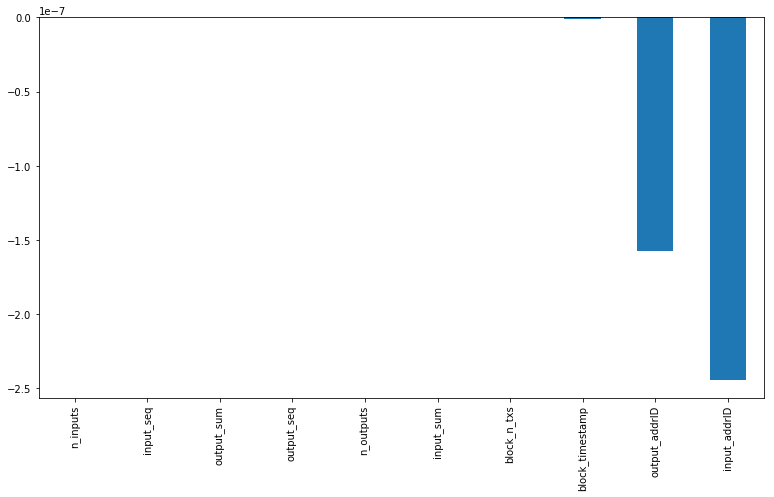

In [118]:
# bar chart plot of weights
weight_odds['weights'].plot.bar(figsize=(13,7))